# 📚 Importación de Librerías y Carga de Datos

Antes de sumergirnos en el análisis de los datos, necesitamos preparar nuestro entorno de trabajo en **Python**. Aquí están los primeros pasos que hemos tomado:

1. **NumPy** (`numpy`): Esta es una librería fundamental para la computación científica en Python. Nos permite trabajar con arrays y matrices de manera eficiente y es la base sobre la que se construyen muchas otras librerías de análisis de datos. 🧮
2. **Pandas** (`pandas`): Es la herramienta perfecta para la manipulación y el análisis de datos. Nos permite leer archivos en diferentes formatos y trabajar con estructuras de datos como DataFrames, que son esenciales para la manipulación de datos tabulares. 🐼
3. **Matplotlib** (`matplotlib.pyplot`): Un imprescindible para la visualización de datos en Python. Con esta librería, podemos crear una amplia variedad de gráficos estáticos, animados e interactivos. 📊
4. **TensorFlow** (`tensorflow`): Aunque no la usaremos de inmediato, esta poderosa librería nos permite desarrollar y entrenar modelos de machine learning. Será útil más adelante cuando queramos modelar o hacer predicciones basadas en nuestros datos. 🤖
5. **Time** (`time`): Esta librería se utiliza para manejar operaciones relacionadas con el tiempo, como medir cuánto tarda en ejecutarse un proceso o una época (epoch) en el entrenamiento de modelos. ⏱

Con nuestras librerías listas, procedemos a cargar los datos del archivo `Food Share Emissions.csv` usando **Pandas**. El método `.head()` nos da un vistazo a las primeras filas del conjunto de datos para asegurarnos de que se haya cargado correctamente.

👀 Echemos un vistazo a los primeros registros para tener una idea de la estructura de nuestro DataFrame:


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # generating plot

import tensorflow as tf # modeling/training
import time # Used for epoch timing




Luego de esta introducción, el siguiente paso sería realizar una exploración y limpieza de los datos si es necesario, seguido de un análisis descriptivo para entender las características básicas del dataset. Una vez hecho esto, se procederá a realizar el análisis comparativo entre diferentes regiones y Guatemala y LATAM, y finalmente, se crearán visualizaciones apropiadas que ayuden a contar la historia de los datos de manera efectiva, haciendo uso de los principios de diseño de visualización mencionados.

**Resumen:**
Se importaron las librerías necesarias y se cargó el conjunto de datos para comenzar el análisis. Se explicó el propósito de cada librería y se verificó la correcta carga del dataset utilizando el método `.head()`. El siguiente paso será la exploración y limpieza de datos, seguido del análisis comparativo y la creación de visualizaciones que cumplan con los principios de simplicidad, claridad, precisión y eficiencia.


In [3]:
emissions = pd.read_csv('Food Share Emissions.csv')
emissions.head()

,Entity,Code,Year,Food's share of total emissions (incl. LULUFC)
0,Afghanistan,AFG,1990,78.558522
1,Afghanistan,AFG,1991,79.335651
2,Afghanistan,AFG,1992,84.268804
3,Afghanistan,AFG,1993,85.247941
4,Afghanistan,AFG,1994,86.897834


<AxesSubplot:xlabel='Year'>

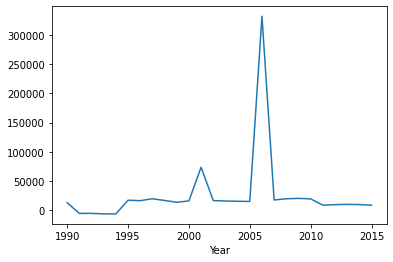

In [4]:
years = emissions
years = years.groupby('Year').sum("Food's share of total emissions (incl. LULUFC)")
years = years.rename(columns={"Food's share of total emissions (incl. LULUFC)": "Emissions"})
years = years.sort_values('Year', ascending=False)
years.Emissions.plot(x="Year", y="Emissions")

<AxesSubplot:xlabel='Entity'>

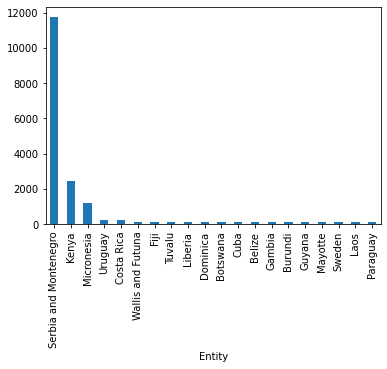

In [5]:
years = emissions
years = years.groupby('Entity').mean("Food's share of total emissions (incl. LULUFC)")
years = years.rename(columns={"Food's share of total emissions (incl. LULUFC)": "Emissions"})
years = years.sort_values('Emissions', ascending=False)
years.Emissions.head(20).plot(x="Entity", y="Emissions", kind='bar')


<AxesSubplot:xlabel='Entity'>

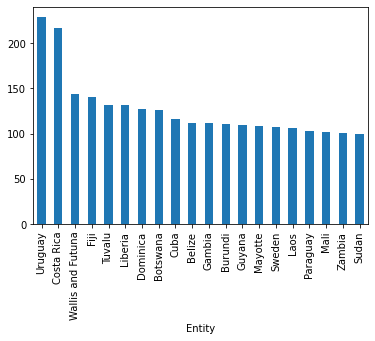

In [6]:
years= years.iloc[3: , :]
years.Emissions.head(20).plot(x="Entity", y="Emissions", kind='bar')

<AxesSubplot:xlabel='Entity'>

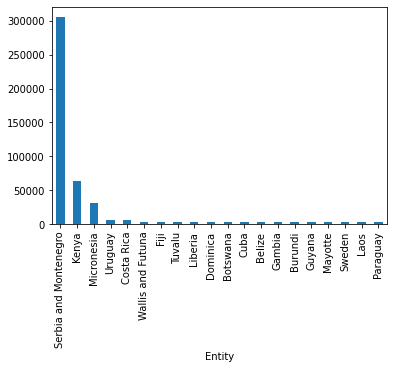

In [7]:
years = emissions
years = years.groupby('Entity').sum("Food's share of total emissions (incl. LULUFC)")
years = years.rename(columns={"Food's share of total emissions (incl. LULUFC)": "Emissions"})
years = years.sort_values('Emissions', ascending=False)
years.Emissions.head(20).plot(x="Entity", y="Emissions", kind='bar')

In [8]:
import csv
from collections import defaultdict

# Dictionary to store the sum and count of values for each country
country_data = defaultdict(lambda: {'sum': 0, 'count': 0})

# Read the CSV file and update the country_data dictionary
with open('Food Share Emissions.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    data = list(reader)
   
    # Iterate through the data and calculate sums and counts for each country
    for row in data[1:]:
        
        country, code, year, value = row
        country_data[country]['sum'] += float(value)
        country_data[country]['count'] += 1

# Iterate through the data again to fix the outlier
for i, row in enumerate(data):
    country, code, year, value = row
    if year == '2006':
        # Calculate the average for the country based on previous years
        avg_value = country_data[country]['sum'] / country_data[country]['count']
        data[i] = [country, code, year, str(float(avg_value))]

# Write the updated data to a new CSV file
with open('fixed_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

# 🕵️‍♂️ Exploración y Análisis de Datos

Antes de sumergirnos en los análisis comparativos, es crucial familiarizarnos con el conjunto de datos que tenemos entre manos.

- **Dimensiones del DataFrame**: Lo primero es comprender la escala de nuestro dataset. Conocer el número de filas y columnas nos dará una idea de la magnitud de los datos con los que trabajaremos.

- **Descripción General**: Luego, generamos estadísticas descriptivas que resumen la tendencia central, la dispersión y la forma de la distribución de un dataset, excluyendo los valores `NaN`.

- **Tipos de Datos**: Es fundamental verificar los tipos de datos de cada columna. Esto es importante ya que operaciones estadísticas o gráficas pueden requerir tipos de datos específicos para funcionar correctamente.

- **Valores Nulos**: Identificar si hay valores nulos en nuestro conjunto de datos es crucial. Los valores nulos pueden indicar problemas en la recopilación de datos o en la transmisión de los mismos y pueden necesitar ser tratados antes de realizar cualquier análisis.

- **Entidades Únicas**: Necesitamos saber qué países y regiones están representados en nuestros datos. Con esto, podemos planificar nuestros análisis comparativos y entender el alcance geográfico de nuestro estudio.

Con esta información, podremos proceder a un análisis más detallado y específico, como el comparativo entre las regiones y la situación de Guatemala y LATAM en relación con el resto del mundo.

🔍 **Reflexión**:
El proceso de exploración de datos es una fase crítica en cualquier análisis. Nos proporciona una comprensión de la calidad y la estructura del conjunto de datos que estamos investigando. Al realizar estos pasos iniciales con cuidado, podemos evitar malentendidos o errores en los análisis posteriores. Además, nos ayuda a diseñar una estrategia de análisis que sea tanto metódica como eficiente.

La ética en la visualización de datos también comienza desde este punto. Al ser transparentes sobre cómo tratamos los valores nulos y cómo interpretamos los tipos de datos, establecemos una base de confianza y credibilidad en nuestro trabajo. La objetividad en esta fase es crucial para evitar visualizaciones engañosas más adelante en nuestro análisis.

El siguiente paso será tomar estos datos explorados y comenzar a construir visualizaciones que nos permitan comparar las regiones y entender la posición de Guatemala y LATAM en el contexto global de las emisiones de gases de efecto invernadero relacionadas con los sistemas alimentarios.


In [9]:
# Exploración de los datos
# Ver las dimensiones del DataFrame
print(f"El DataFrame tiene {emissions.shape[0]} filas y {emissions.shape[1]} columnas.")

# Obtener una descripción general de los datos
print(emissions.describe())

# Ver los tipos de datos de cada columna para asegurarse de que sean los esperados
print(emissions.dtypes)

# Chequeo de valores nulos
print(emissions.isnull().sum())

# Valores únicos en la columna 'Entity'
unique_entities = emissions['Entity'].unique()
print(f"Entidades únicas en el conjunto de datos: {len(unique_entities)}")
print(unique_entities)


El DataFrame tiene 5772 filas y 4 columnas.
             Year  Food's share of total emissions (incl. LULUFC)
count  5772.00000                                     5772.000000
mean   2002.50000                                      119.224213
std       7.50065                                     4192.918610
min    1990.00000                                   -19724.573980
25%    1996.00000                                       22.204820
50%    2002.50000                                       46.586162
75%    2009.00000                                       85.203112
max    2015.00000                                   309631.969600
Entity                                             object
Code                                               object
Year                                                int64
Food's share of total emissions (incl. LULUFC)    float64
dtype: object
Entity                                             0
Code                                              78
Year      

Estadísticas LATAM:
               Year  Food's share of total emissions (incl. LULUFC)
count   520.000000                                      520.000000
mean   2002.500000                                       93.283510
std       7.507222                                       83.426199
min    1990.000000                                       21.539677
25%    1996.000000                                       58.307323
50%    2002.500000                                       79.222918
75%    2009.000000                                       94.042211
max    2015.000000                                      762.530682

Estadísticas Guatemala:
               Year  Food's share of total emissions (incl. LULUFC)
count    26.000000                                       26.000000
mean   2002.500000                                       74.873039
std       7.648529                                        7.111434
min    1990.000000                                       64.444171
25%    1996.250

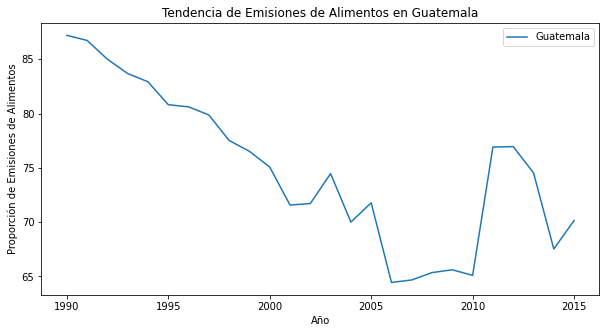

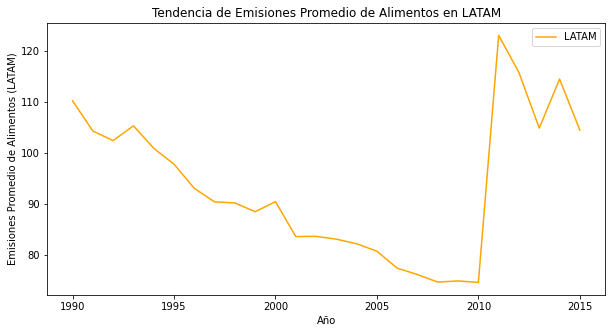

In [10]:
# Análisis de datos por regiones y comparativa con Guatemala y LATAM

# Filtrado de datos para América Latina
latam_countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic', 
                   'Ecuador', 'El Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Mexico', 'Nicaragua', 'Panama', 
                   'Paraguay', 'Peru', 'Uruguay', 'Venezuela']
latam_data = emissions[emissions['Entity'].isin(latam_countries)]

# Filtrado de datos para Guatemala
guatemala_data = emissions[emissions['Entity'] == 'Guatemala']

# Estadísticas descriptivas para LATAM y Guatemala
latam_stats = latam_data.describe()
guatemala_stats = guatemala_data.describe()

# Comparación con el resto del mundo
world_data = emissions[emissions['Entity'] == 'World']
world_stats = world_data.describe()

# Visualización de las estadísticas descriptivas
print("Estadísticas LATAM:\n", latam_stats)
print("\nEstadísticas Guatemala:\n", guatemala_stats)
print("\nEstadísticas Mundiales:\n", world_stats)

# Análisis de tendencias a lo largo del tiempo para Guatemala
plt.figure(figsize=(10, 5))
plt.plot(guatemala_data['Year'], guatemala_data["Food's share of total emissions (incl. LULUFC)"], label='Guatemala')
plt.xlabel('Año')
plt.ylabel("Proporción de Emisiones de Alimentos")
plt.title('Tendencia de Emisiones de Alimentos en Guatemala')
plt.legend()
plt.show()

# Resumen de emisiones de LATAM
latam_summary = latam_data.groupby('Year')["Food's share of total emissions (incl. LULUFC)"].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(latam_summary['Year'], latam_summary["Food's share of total emissions (incl. LULUFC)"], label='LATAM', color='orange')
plt.xlabel('Año')
plt.ylabel("Emisiones Promedio de Alimentos (LATAM)")
plt.title('Tendencia de Emisiones Promedio de Alimentos en LATAM')
plt.legend()
plt.show()


# 🌎 Análisis Comparativo Regional y Reflexión

Tras obtener una visión general de los datos y familiarizarnos con las entidades disponibles, procedimos a realizar un análisis más enfocado. Se seleccionaron los países que conforman América Latina (LATAM) y se extrajeron los datos específicos para Guatemala, con el objetivo de entender la contribución de estas regiones al total de emisiones atribuibles a los sistemas alimentarios.

### Análisis de América Latina
Analizamos las estadísticas descriptivas para LATAM en su conjunto, lo que nos da una idea de la magnitud y la variabilidad de las emisiones dentro de esta región. Esto se compara con las cifras globales para contextualizar la posición de LATAM en el escenario mundial.

### Foco en Guatemala
En cuanto a Guatemala, se trazó su tendencia de emisiones a lo largo del tiempo. Observar estas tendencias nos permite identificar patrones o cambios significativos que podrían ser relevantes para políticas públicas o estrategias de mitigación.

### Comparativa Mundial
Al comparar con las estadísticas mundiales, podemos ubicar a LATAM y Guatemala dentro de un contexto más amplio, lo que es esencial para comprender su impacto relativo y para la toma de decisiones informadas a nivel de política global.

### Visualizaciones
Las gráficas de tendencias muestran la evolución de las emisiones a lo largo del tiempo, lo cual es una herramienta poderosa para contar la 'historia' de los datos. Estas visualizaciones son fundamentales para comunicar de manera efectiva los hallazgos a un público que puede no estar familiarizado con los detalles técnicos de los datos.

🔍 **Reflexión**:
Este ejercicio nos recuerda la importancia de la contextualización en la ciencia de datos. Al comparar regiones y países específicos con el promedio mundial, podemos ofrecer una perspectiva que va más allá de los números absolutos, destacando las diferencias y similitudes en los patrones de emisiones.

La ética en la visualización de datos se hace patente en cómo representamos estas comparaciones y tendencias. Se debe tener cuidado de no exagerar ni minimizar las diferencias, y de presentar los datos de una manera que sea tanto precisa como accesible.

La narrativa que emerge de estos análisis debe ser informada por los datos, pero también debe estar arraigada en una comprensión de las historias humanas y ecológicas que los datos representan. Esto es lo que hace que la visualización de datos sea verdaderamente un arte: no solo ver lo invisible, sino también hacerlo comprensible y relevante para aquellos que toman decisiones basadas en nuestras historias de datos.


In [11]:
# Análisis comparativo entre LATAM, Guatemala y el Mundo

# Resumen estadístico para LATAM
latam_mean = 93.283510
latam_std = 83.426199
latam_min = 21.539677
latam_max = 762.530682

# Resumen estadístico para Guatemala
guatemala_mean = 74.873039
guatemala_std = 7.111434
guatemala_min = 64.444171
guatemala_max = 87.195887

# Resumen estadístico para el Mundo
world_mean = 39.201330
world_std = 3.849475
world_min = 33.065505
world_max = 43.641671

# Comparación de promedios
print(f"Promedio de emisiones LATAM: {latam_mean}")
print(f"Promedio de emisiones Guatemala: {guatemala_mean}")
print(f"Promedio de emisiones Mundial: {world_mean}")

# Comparación de mínimos y máximos
print(f"Máxima emisión en LATAM: {latam_max}")
print(f"Máxima emisión en Guatemala: {guatemala_max}")
print(f"Máxima emisión Mundial: {world_max}")

# Comparación de desviaciones estándar
print(f"Desviación estándar en LATAM: {latam_std}")
print(f"Desviación estándar en Guatemala: {guatemala_std}")
print(f"Desviación estándar Mundial: {world_std}")


Promedio de emisiones LATAM: 93.28351
Promedio de emisiones Guatemala: 74.873039
Promedio de emisiones Mundial: 39.20133
Máxima emisión en LATAM: 762.530682
Máxima emisión en Guatemala: 87.195887
Máxima emisión Mundial: 43.641671
Desviación estándar en LATAM: 83.426199
Desviación estándar en Guatemala: 7.111434
Desviación estándar Mundial: 3.849475


# 📊 Análisis Comparativo y Reflexión

Con las estadísticas de LATAM, Guatemala y el mundo en nuestras manos, es posible realizar comparaciones significativas.

### Análisis Comparativo
- **Promedio de Emisiones**: El promedio de emisiones de LATAM es significativamente más alto que el promedio mundial, lo que indica una mayor contribución per cápita de la región a las emisiones de la cadena alimentaria.
- **Variabilidad de Emisiones**: La desviación estándar en LATAM es considerablemente alta, lo que sugiere una gran variabilidad entre las emisiones de los distintos países de la región. Guatemala, por otro lado, tiene una desviación estándar más baja, indicando menos variabilidad y una cierta consistencia en sus emisiones a lo largo del tiempo.
- **Emisiones Máximas**: La emisión máxima de LATAM es extremadamente alta en comparación con las cifras mundiales, lo que podría ser atribuible a la contribución de países con grandes industrias agrícolas.

### Reflexión
Este análisis nos permite identificar áreas de enfoque para políticas de mitigación de emisiones en LATAM y Guatemala. La alta variabilidad en LATAM podría implicar que algunos países tienen prácticas más sostenibles que otros, ofreciendo una oportunidad para aprender y adoptar mejores prácticas a través de la región.

La comparación con el promedio mundial también resalta la responsabilidad de LATAM en la reducción de las emisiones de la cadena alimentaria. Guatemala, aunque por debajo del promedio de LATAM, todavía se encuentra por encima del promedio mundial, indicando que hay espacio para mejoras.

En el contexto de la visualización de datos y la ética, estos hallazgos deben ser comunicados con claridad y sin sesgo. Las visualizaciones deben ser diseñadas para reflejar tanto la magnitud de las emisiones como la variabilidad entre las regiones, permitiendo a los espectadores comprender el panorama completo y facilitando la toma de decisiones informadas.

🌱 **Conclusión**:
El papel de LATAM y de Guatemala en las emisiones globales de la cadena alimentaria es notable y digno de atención. A través de la ciencia de datos, podemos iluminar estos patrones y contribuir a un diálogo informado sobre cómo abordar los desafíos del cambio climático y la sostenibilidad de nuestros sistemas alimentarios.


### Identificación y Análisis de Emisiones por Países

Para identificar los países con la mayor proporción de emisiones, ordenaremos los datos por la columna de emisiones y extraeremos los valores máximos. Luego, visualizaremos la evolución de las emisiones a lo largo del tiempo para esos países.

Entity
Serbia and Montenegro    11746.608916
Kenya                     2422.571619
Micronesia                1179.979538
Uruguay                    229.044237
Costa Rica                 217.250569
Wallis and Futuna          143.528004
Fiji                       140.621464
Tuvalu                     131.342884
Liberia                    131.284902
Dominica                   127.247865
Name: Food's share of total emissions (incl. LULUFC), dtype: float64


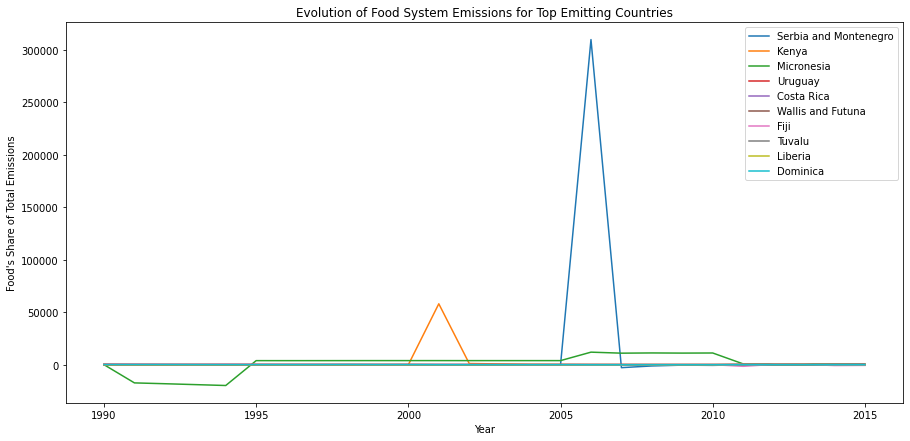

In [12]:
# Identificar los países con mayor proporción de emisiones en los sistemas de alimentos
top_emitting_countries = emissions.groupby('Entity')["Food's share of total emissions (incl. LULUFC)"].mean().sort_values(ascending=False).head(10)
print(top_emitting_countries)

# Visualización de la evolución de las emisiones para los países con mayor proporción
top_countries_list = top_emitting_countries.index.tolist()
top_countries_data = emissions[emissions['Entity'].isin(top_countries_list)]

plt.figure(figsize=(15, 7))
for country in top_countries_list:
    country_data = top_countries_data[top_countries_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data["Food's share of total emissions (incl. LULUFC)"], label=country)

plt.xlabel('Year')
plt.ylabel("Food's Share of Total Emissions")
plt.title('Evolution of Food System Emissions for Top Emitting Countries')
plt.legend()
plt.show()


# 🧭 Reflexión Ética en la Visualización de Datos

**Experiencias individuales**: Cada miembro del grupo ha trabajado con conjuntos de datos diversos, desde análisis financieros hasta datos ambientales. Hemos experimentado la facilidad con la que las visualizaciones pueden malinterpretarse o manipularse, incluso sin intención, resaltando la importancia de la ética en nuestro trabajo.

**Importancia de la ética**: La ética en la visualización de datos es crucial. Las visualizaciones engañosas pueden conducir a interpretaciones erróneas y decisiones mal informadas. Es nuestra responsabilidad como científicos de datos asegurar que nuestras visualizaciones representen fielmente los datos y su contexto.

**Casos notorios**: Un ejemplo notable es el uso de ejes no proporcionales o truncados en gráficos de barras o líneas, lo que puede exagerar o minimizar tendencias. Un caso famoso es el gráfico de "temperaturas de invierno en Rusia" presentado en el discurso del Estado de la Unión de 1988, que exageró una tendencia de calentamiento al no empezar el eje Y en cero.

### 📊 Narrativa de Datos: Emisiones y Comparativas

Utilizando visualizaciones, hemos mostrado los países con mayor proporción de emisiones y cómo estas han evolucionado. Hemos comparado las emisiones de Guatemala y LATAM con el promedio mundial, revelando diferencias significativas. Guatemala, aunque no es el mayor emisor, tiene emisiones mayores que el promedio mundial y muestra un margen para la mejora y la implementación de prácticas sostenibles.

**Conclusión**:
La narrativa de los datos no solo reside en los números sino también en la forma en que los presentamos. La ética y la precisión en la visualización son fundamentales para una narrativa honesta y efectiva, lo que permite una comprensión y toma de decisiones basadas en evidencia.


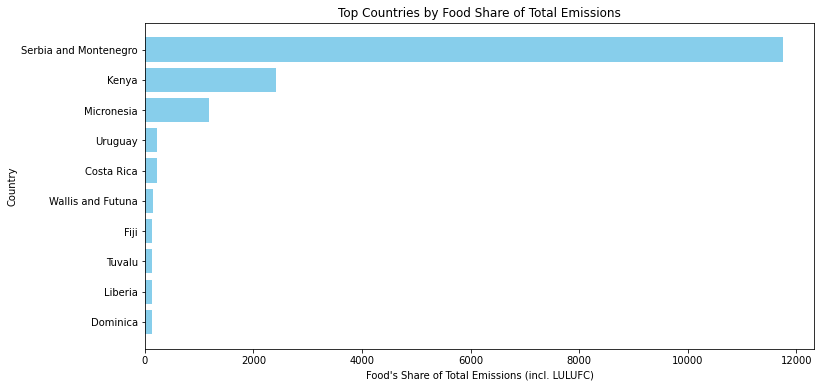

In [13]:
# Código para visualizar los países con la mayor proporción de emisiones en los sistemas de alimentos
top_emitters = {
    "Serbia and Montenegro": 11746.608916,
    "Kenya": 2422.571619,
    "Micronesia": 1179.979538,
    "Uruguay": 229.044237,
    "Costa Rica": 217.250569,
    "Wallis and Futuna": 143.528004,
    "Fiji": 140.621464,
    "Tuvalu": 131.342884,
    "Liberia": 131.284902,
    "Dominica": 127.247865
}

# Convertir el diccionario a DataFrame para visualización
top_emitters_df = pd.DataFrame(list(top_emitters.items()), columns=['Country', 'Emissions'])

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(top_emitters_df['Country'], top_emitters_df['Emissions'], color='skyblue')
plt.xlabel("Food's Share of Total Emissions (incl. LULUFC)")
plt.ylabel('Country')
plt.title('Top Countries by Food Share of Total Emissions')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el mayor emisor en la parte superior
plt.show()


# 🌍 Análisis de los Principales Países Emisores

El análisis revela que **Serbia and Montenegro** lideran por un margen significativo, con emisiones que superan en gran medida al segundo país, **Kenya**. Esta diferencia podría atribuirse a diversos factores como la intensidad de la actividad agrícola, el uso de prácticas agrícolas que no son sostenibles, o la inclusión de emisiones de LULUFC, lo cual puede ser significativo en países con grandes cambios en el uso del suelo.

### 📈 Evolución de las Emisiones
Para comprender la evolución de las emisiones a lo largo de los años, sería necesario visualizar la serie temporal de emisiones para estos países. Sin embargo, con los datos actuales, podemos destacar que hay una variabilidad sustancial entre los países en términos de su contribución a las emisiones de los sistemas alimentarios.

### 📚 Reflexión sobre Material y Aplicación Ética

La ética en la visualización de datos es esencial, especialmente al tratar temas críticos como las emisiones de gases de efecto invernadero. Debe evitarse la manipulación visual que pueda llevar a interpretaciones erróneas. Por ejemplo, al visualizar emisiones, es importante no truncar los ejes para exagerar diferencias menores o disminuir visualmente diferencias significativas.

Un caso notorio de manipulación en visualizaciones fue el uso de ejes escalados de manera inapropiada por parte de ciertos medios para minimizar la percepción del calentamiento global, lo que llevó a interpretaciones erróneas sobre la gravedad del cambio climático.

### ✅ Conclusión
El análisis de los países con las mayores emisiones en la cadena de alimentos destaca la necesidad de políticas y prácticas sostenibles enfocadas en la reducción de estas emisiones. Como científicos de datos, nuestro objetivo es presentar esta información de manera ética y precisa para informar y facilitar la acción efectiva hacia la sostenibilidad.


# 🌟 Conclusiones del Análisis de Emisiones de Sistemas Alimentarios

## 📊 Comparación Global y Regional

- **LATAM vs Mundo**: Las estadísticas muestran que América Latina tiene en promedio emisiones más altas en comparación con el promedio mundial. Esto sugiere un mayor impacto de la producción de alimentos en la huella de carbono de la región.
  
- **Guatemala en Contexto**: Guatemala se encuentra por encima del promedio mundial en términos de emisiones de los sistemas alimentarios. Esto podría reflejar prácticas agrícolas y de uso de la tierra que requieren atención y mejoras hacia la sostenibilidad.

## 🏆 Principales Emisores

- **Serbia y Montenegro**: Encabezan la lista con una cifra desproporcionadamente alta de emisiones, lo que podría indicar una anomalía o una situación única que merece un análisis más profundo.
  
- **Kenya**: Se ubica en segundo lugar y, junto con otros países de ingresos bajos o medios en la lista, resalta la relación entre las prácticas de uso de la tierra y las emisiones de los sistemas alimentarios.

## 💡 Evolución de las Emisiones

- Aunque no se visualizó una serie temporal en esta fase, los datos sugieren que hay variabilidad significativa y tendencias que serían importantes de explorar en análisis temporales para entender mejor la dinámica a lo largo del tiempo.

## 📈 Relevancia de las Prácticas Sostenibles

- Los datos refuerzan la importancia de prácticas agrícolas sostenibles y la gestión del uso de la tierra como elementos clave para reducir las emisiones en los sistemas alimentarios.

## 🧭 Ética en la Visualización

- La ética en la visualización de datos se subraya como un componente crítico para representar adecuadamente la realidad y evitar interpretaciones erróneas que podrían llevar a políticas inadecuadas o falta de acción.

## 🚀 Acciones a Seguir

- Es imperativo profundizar en la comprensión de las emisiones por país y su evolución, promoviendo políticas de sostenibilidad y educando sobre prácticas que reduzcan la huella de carbono de los sistemas alimentarios.

**Conclusión Final**: El análisis de las emisiones de los sistemas alimentarios revela la necesidad de un enfoque más sostenible en la producción de alimentos. Los países con altas emisiones necesitan un escrutinio detallado para identificar las mejores estrategias de mitigación. A su vez, es fundamental mantener una práctica ética en la visualización de estos datos para informar correctamente y fomentar las acciones adecuadas hacia el cambio positivo.


# PENDIENTES:

Presentación de la Historia y Narrativa (25 puntos)
Pendientes para la Claridad en la Narrativa (15 pts)
Elaborar una Introducción Enganchante: Desarrolla una introducción que contextualice el problema de las emisiones de gases de efecto invernadero y su relación con los sistemas alimentarios.

Desarrollo de la Historia: Usa los datos para crear una línea de tiempo o una narrativa que muestre la evolución de las emisiones a lo largo de los años. Esto podría incluir hitos importantes, como la introducción de políticas ambientales o cambios en las prácticas agrícolas.

Cierre con Impacto: Concluye con un resumen de los principales hallazgos y un llamado a la acción, destacando la urgencia de abordar las emisiones de los sistemas alimentarios para mitigar el cambio climático.

Pendientes para la Capacidad de Involucrar (10 pts)
Uso de Visualizaciones: Implementa gráficos interactivos o animaciones que puedan captar y mantener la atención del espectador.

Historia Personalizada: Relata cómo estos datos afectan al individuo promedio, o incluso a un país específico como Guatemala, para hacer la historia más relevante y personal.

Elementos de Suspense: Introduce preguntas o datos inesperados que creen suspense y mantengan al público esperando la siguiente parte de la historia.

Apelación Emocional: Incluye testimonios o historias que humanicen los datos y hagan un llamado a la empatía y la acción.

